# Contexte
Les opérations de contrôle qualité intégrées aux chaines de production permettent à la fois de garantir la qualité finale du produit, d’éviter la propagation de pièce défaillantes vers les process suivants et de détecter au plus tôt les dérives pour en corriger les causes.

Une technique courante est d’utiliser une caméra pour réaliser une ou plusieurs prises de vues du produit et d’y appliquer des algorithmes spécifiques pour controler certaines caractéristiques. **Si le système identifie un défaut, il est courant de demander un recontrole humain ce qui constitue une charge de travail supplémentaire et un risque d’erreur inhérent au contrôle humain**.

L’utilisation de modèles de computer vision permet de rejuger automatiquement certains types d’images avec des performances supérieures à celles des opérateurs.

# But
L’objectif basique de ce challenge est de réaliser une classification des images. Il existe une classe pour **les pièces bonnes et des classes pour différents types de défauts**. Cet objectif est assez classique, même si la diversité des données peut rendre cette tâche plus complexe.

Le second objectif est d'être capable de détecter les images anormales. Il est important de pouvoir détecter des dérives car la qualité des prédictions de classification sur des images d’un type non connu n’est pas maitrisée et très probablement faible.

En résumé, l’objectif d’identifer la classe de l’image si elle appartient au domaine connu ou de la classer comme anormale si elle n’appartient pas à ce domaine.


# Résumé : 
Input : X image d'une pièce

Si X appartient à la classe C_normal,

Sinon X est défaut et appartient à une classe de défaut connue


In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader

In [2]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images
    transforms.ToTensor(),  # Convert to tensor
])
# load the training dataset
train_dataset = datasets.ImageFolder(root='input_train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# load the testing dataset
test_dataset = datasets.ImageFolder(root='input_test_1a4aqAg', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=True)

print("There are ", len(train_dataset), "training images and ", len(test_dataset), "test images")
image_size=list(train_dataset[0][0].shape)
print(f"Example of an image size: {image_size}")  # [28, 28]


There are  8278 training images and  1055 test images
Example of an image size: [3, 128, 128]


In [3]:
label_map = {
    0: "GOOD",
    1: "Boucle plate",
    2: "Lift-off blanc",
    3: "Lift-off noir",
    4: "Missing",
    5: "Short circuit MOS"
}

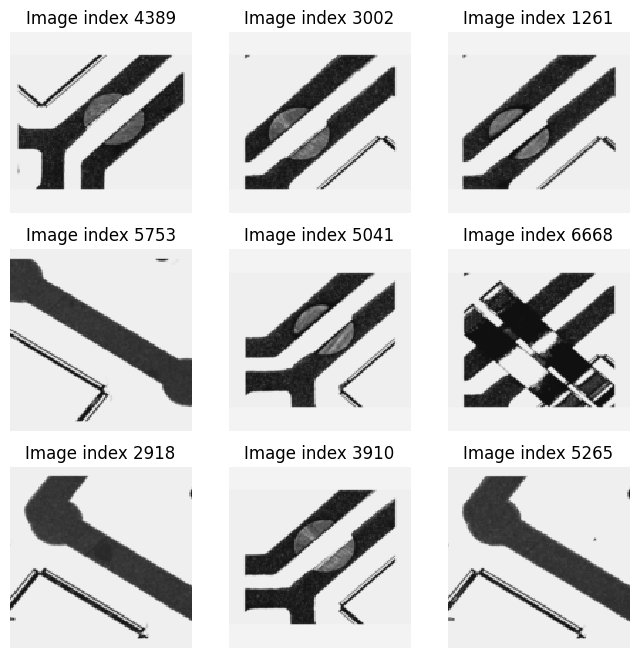

In [4]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    index = np.random.randint(0, len(train_dataset))
    testI, _ = train_dataset[index]
    figure.add_subplot(rows, cols, i)
    plt.imshow(testI.numpy().transpose(1, 2, 0), interpolation='nearest', cmap=plt.cm.gray)
    plt.title(f"Image index {index}")
    plt.axis('off')
plt.show()